In [2]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


In [4]:
#Lead dataset
from google.colab import files
uploaded = files.upload()
df = pd.read_csv("Mall_Customers.csv")
df.head()

Saving Mall_Customers.csv to Mall_Customers (1).csv


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
#Basic Information and Cleaning
print(df.info())
print(df.isnull().sum())
#Drop any missing values
df.dropna(inplace=True)
#Display basic statistics
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None
CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


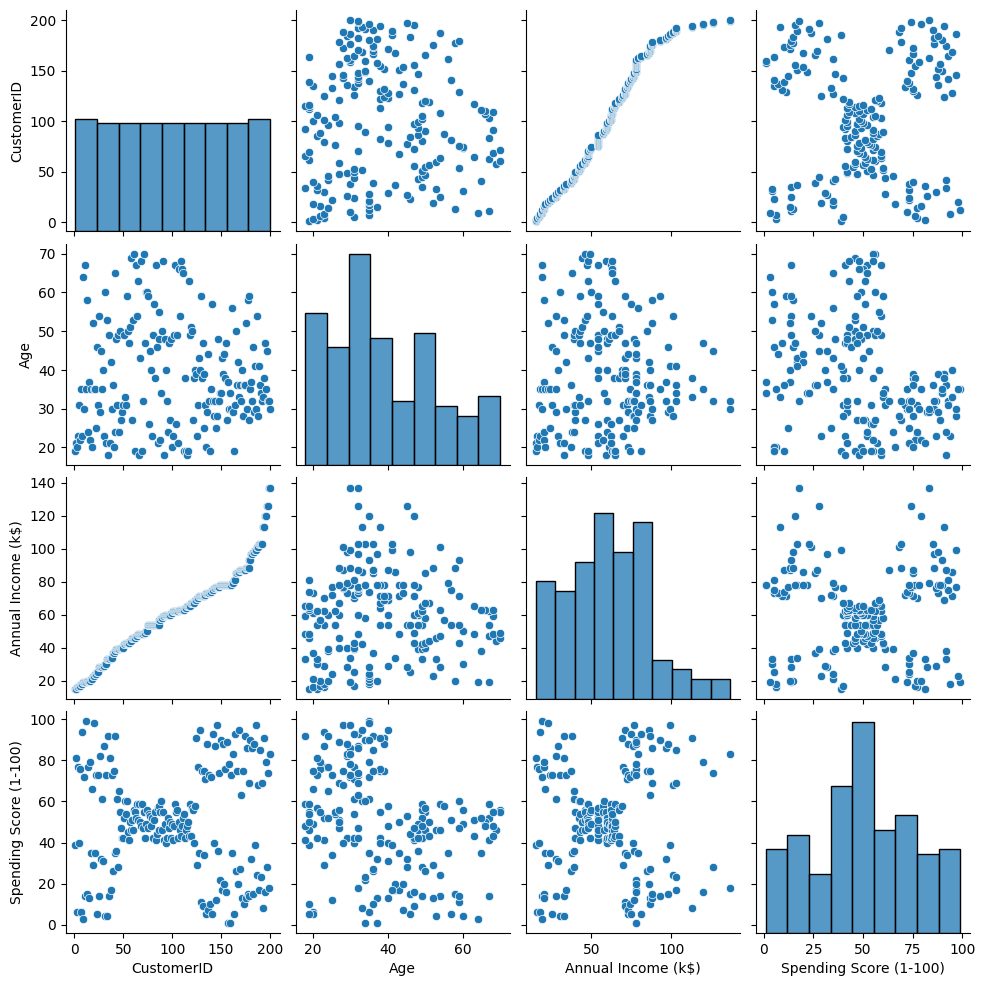

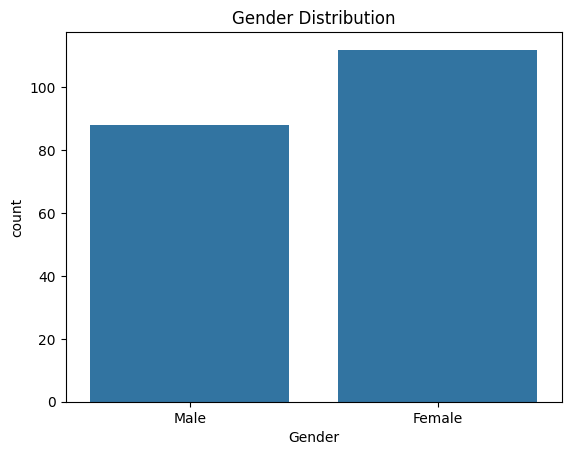

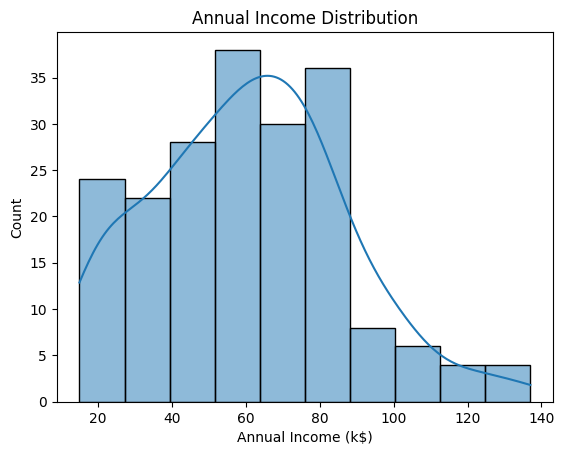

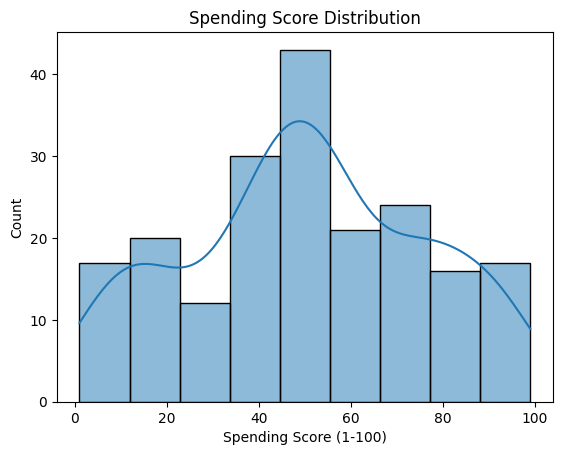

In [6]:
#Quick EDA
sns.pairplot(df)
plt.show()

#Gender Distributioon
sns.countplot(x='Gender', data=df)
plt.title("Gender Distribution")
plt.show()

#Income Distribution
sns.histplot(df['Annual Income (k$)'], kde=True)
plt.title("Annual Income Distribution")
plt.show()

#Spending Score Distribution
sns.histplot(df['Spending Score (1-100)'], kde=True)
plt.title("Spending Score Distribution")
plt.show()


1. Most Customers have income between 40-70K USD
2. Female Customers are slightly higher than male customers
3. Spending score is widely distributed- potential for segmentation

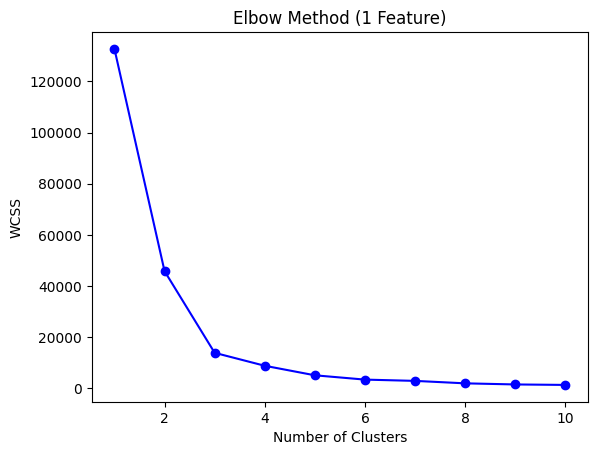

Silhouette Score for k=2: 0.5351924727996745
Silhouette Score for k=3: 0.6519559133746224
Silhouette Score for k=4: 0.6012604522879379
Silhouette Score for k=5: 0.6103466377877246


In [21]:
#K-means on one features
X1= df[['Spending Score (1-100)']]

#Finding optimal k using elbow method
wcss = []
for i in range(1,11):
  kmeans = KMeans(n_clusters=i, random_state=42)
  kmeans.fit(X1)
  wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss, 'bo-')
plt.title('Elbow Method (1 Feature)')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()


  #Silhouette scores
for k in range(2,6):
  kmeans=KMeans(n_clusters=k, random_state=42)
  kmeans.fit(X1)
  score= silhouette_score(X1, kmeans.labels_)
  print(f"Silhouette Score for k={k}: {score}")


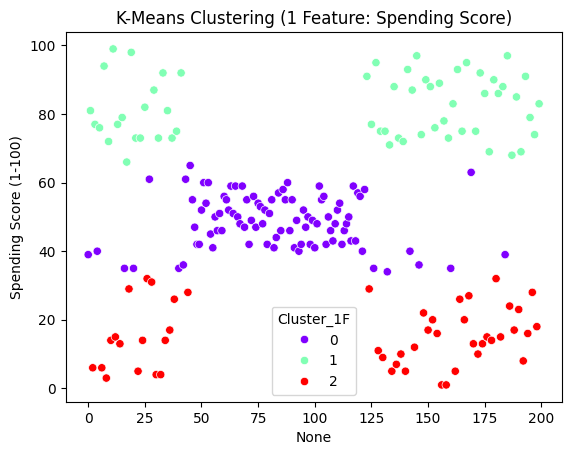

In [22]:
#Assume optimal k=3 (from elbow)
kmeans_1 = KMeans(n_clusters=3, random_state=42)
df['Cluster_1F'] = kmeans_1.fit_predict(X1)

sns.scatterplot(x=df.index, y='Spending Score (1-100)', hue='Cluster_1F', palette='rainbow', data=df)
plt.title("K-Means Clustering (1 Feature: Spending Score)")
plt.show()

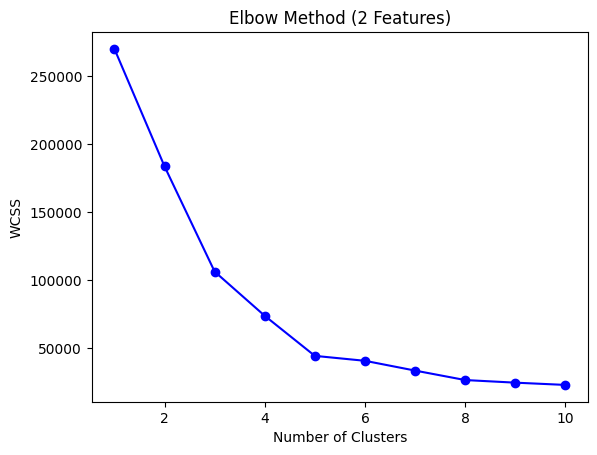

Silhouette Score for k=2: 0.39564531743995546
Silhouette Score for k=3: 0.46761358158775435
Silhouette Score for k=4: 0.4937945814354117
Silhouette Score for k=5: 0.553931997444648


In [28]:
#K-Means on two features
X2= df[['Annual Income (k$)', 'Spending Score (1-100)']]

#Elbow Method
wcss2 = []
for i in range(1,11):
  kmeans= KMeans(n_clusters=i, random_state=42)
  kmeans.fit(X2)
  wcss2.append(kmeans.inertia_)

plt.plot(range(1,11), wcss2, 'bo-')
plt.title('Elbow Method (2 Features)')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

for k in range(2,6):
  kmeans = KMeans(n_clusters=k, random_state=42)
  kmeans.fit(X2)
  score= silhouette_score(X2, kmeans.labels_)
  print(f"Silhouette Score for k={k}: {score}")

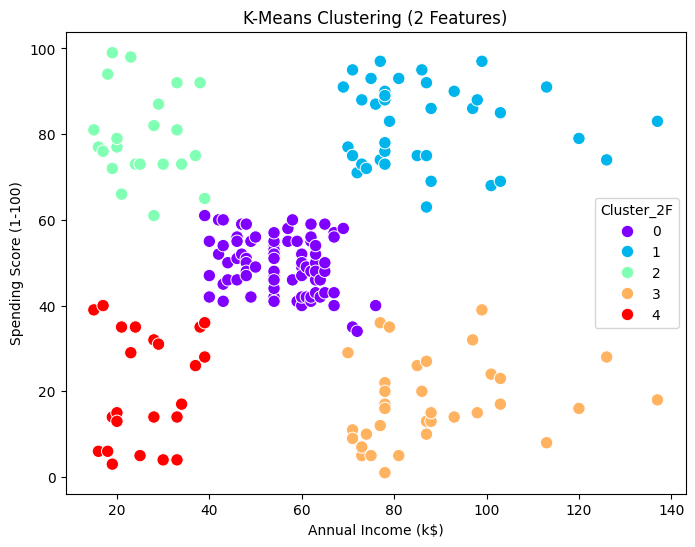

In [29]:
#Assume optimal k=5
kmeans_2 = KMeans(n_clusters=5, random_state=42)
df['Cluster_2F'] = kmeans_2.fit_predict(X2)

plt.figure(figsize=(8,6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster_2F', palette='rainbow', data=df, s=80)
plt.title("K-Means Clustering (2 Features)")
plt.show()


Number of clusters formed (1 feature): 3
Number of clusters formed (2 features): 5


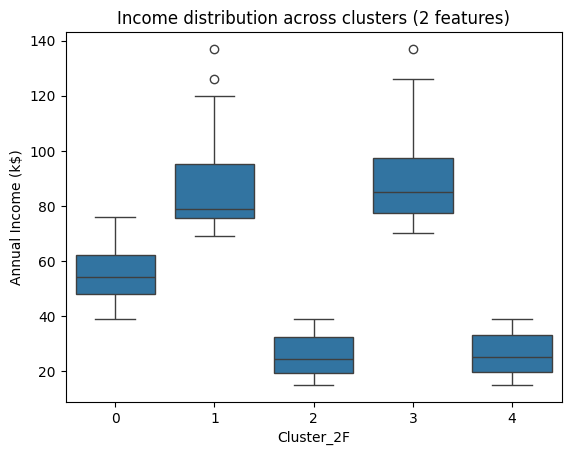

In [30]:
#Compare 1 Feature and 2 Feature
print("Number of clusters formed (1 feature):", df['Cluster_1F'].nunique())
print("Number of clusters formed (2 features):", df['Cluster_2F'].nunique())

sns.boxplot(x='Cluster_2F', y='Annual Income (k$)', data=df)
plt.title("Income distribution across clusters (2 features)")
plt.show()


1. The 1-feature clustering seperates customers by spending habits only.
2. The 2-feature clustering reveals richer groups- e.g high-income high-spenders vs low-income low-spenders

In [33]:
#Simple business recommendations
for i in range(5):
    group = df[df['Cluster_2F'] == i]
    print(f"Cluster {i}: Average Income = {group['Annual Income (k$)'].mean():.1f}, "
          f"Average Spending = {group['Spending Score (1-100)'].mean():.1f}")



Cluster 0: Average Income = 55.3, Average Spending = 49.5
Cluster 1: Average Income = 86.5, Average Spending = 82.1
Cluster 2: Average Income = 25.7, Average Spending = 79.4
Cluster 3: Average Income = 88.2, Average Spending = 17.1
Cluster 4: Average Income = 26.3, Average Spending = 20.9


Recommendation:
1. High Income-High Spend: Offer loyalty rewards or premium services
2. Low Income-High Spend: Encourage through discounts or flexible payment options
3. High Income-Low Spend: Targeted luxury promotions or exclusive offers
4. Low Income-Low Spend: Budget deals or social media campaigns
5. Medium Group: General engagement via seasonal sales
